In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('avito.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
0,Audi,A8,2010,седан,990 000,4.2,чёрный,полный,левый,бензин,не битый,1,4.0,340 л.с.,160000 км,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
1,Audi,A8,2007,седан,1 250 000,6.0,серый,полный,левый,бензин,не битый,1,4.0,450 л.с.,41075 км,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
2,Audi,Q5,2009,универсал,660 000,2.0,серый,полный,левый,бензин,не битый,2,5.0,211 л.с.,157000 км,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
3,Audi,Q5,2009,внедорожник,769 999,2.0,белый,полный,левый,бензин,не битый,2,NaN,211 л.с.,81000 км,WAUZZZ8R*AA****51,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
4,Audi,Q7,2007,внедорожник,770 000,3.6,чёрный,полный,левый,бензин,не битый,2,5.0,280 л.с.,175000 км,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...


In [38]:
data['Руль'][data['Марка'] == 'Toyota'].value_counts()

левый     2457
правый     230
Name: Руль, dtype: int64

In [41]:
data[(data['Руль'] == 'правый') & (data['Марка'] == 'Toyota')]['Год выпуска'].value_counts()

2002    28
2015    26
2000    21
2001    21
2005    17
2003    17
2014    15
2013    15
2012    14
2004    13
2006    12
2007     9
2008     7
2009     7
2010     4
2011     2
2016     1
2018     1
Name: Год выпуска, dtype: int64

In [35]:
data['Марка'][data['Руль'] == 'правый'].value_counts()

Toyota           230
Nissan           158
Honda             79
Subaru            38
Mitsubishi        33
Mazda             24
Suzuki            17
Audi              14
Opel              10
ВАЗ (LADA)         9
Hyundai            8
BMW                8
Mercedes-Benz      7
Lexus              5
Peugeot            4
Land Rover         4
Renault            4
Volkswagen         4
SsangYong          3
ГАЗ                3
Citroen            2
Skoda              2
Porsche            1
KIA                1
Volvo              1
Chevrolet          1
Name: Марка, dtype: int64

#### Преобразовываю данные в флоат

In [3]:
data['Цена'] = [float(x.replace(' ', '')) for x in data['Цена']]
data['Объём двигателя'] = pd.to_numeric(data['Объём двигателя'], errors='coerce')
data['Владельцев по ПТС'] = pd.to_numeric(data['Владельцев по ПТС'], errors='coerce')
data['Мощность двигателя'] = [float(x.split('л')[0]) for x in data['Мощность двигателя']]
data['Пробег'] = [str(x) for x in data['Пробег']]
data['Пробег'] = [float(x.replace('км', '')) for x in data['Пробег']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 18 columns):
Марка                   41104 non-null object
Модель                  41104 non-null object
Год выпуска             41104 non-null int64
Тип кузова              41104 non-null object
Цена                    41104 non-null float64
Объём двигателя         41016 non-null float64
Цвет                    41104 non-null object
Привод                  41104 non-null object
Руль                    41104 non-null object
Тип двигателя           41104 non-null object
Состояние               34397 non-null object
Владельцев по ПТС       31247 non-null float64
Количество дверей       30300 non-null float64
Мощность двигателя      41104 non-null float64
Пробег                  34397 non-null float64
VIN или номер кузова    41104 non-null object
Коробка передач         41104 non-null object
Ссылка                  41104 non-null object
dtypes: float64(6), int64(1), object(11)
memory usage: 5.6

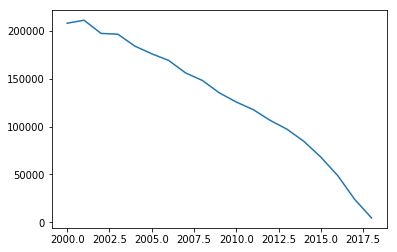

In [5]:
df_kms = data.groupby(by='Год выпуска')['Пробег'].mean()
# plt.plot(data['Пробег'], data['Год выпуска'])
plt.plot(df_kms)

Ебану бейслайн

In [6]:
data_new = data.dropna()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22297 entries, 0 to 41103
Data columns (total 18 columns):
Марка                   22297 non-null object
Модель                  22297 non-null object
Год выпуска             22297 non-null int64
Тип кузова              22297 non-null object
Цена                    22297 non-null float64
Объём двигателя         22297 non-null float64
Цвет                    22297 non-null object
Привод                  22297 non-null object
Руль                    22297 non-null object
Тип двигателя           22297 non-null object
Состояние               22297 non-null object
Владельцев по ПТС       22297 non-null float64
Количество дверей       22297 non-null float64
Мощность двигателя      22297 non-null float64
Пробег                  22297 non-null float64
VIN или номер кузова    22297 non-null object
Коробка передач         22297 non-null object
Ссылка                  22297 non-null object
dtypes: float64(6), int64(1), object(11)
memory usage: 3.2

In [7]:
data_new.head(5)

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
0,Audi,A8,2010,седан,990000.0,4.2,чёрный,полный,левый,бензин,не битый,1.0,4.0,340.0,160000.0,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
1,Audi,A8,2007,седан,1250000.0,6.0,серый,полный,левый,бензин,не битый,1.0,4.0,450.0,41075.0,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
2,Audi,Q5,2009,универсал,660000.0,2.0,серый,полный,левый,бензин,не битый,2.0,5.0,211.0,157000.0,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
4,Audi,Q7,2007,внедорожник,770000.0,3.6,чёрный,полный,левый,бензин,не битый,2.0,5.0,280.0,175000.0,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...
5,Audi,Q3,2011,хетчбэк,820000.0,2.0,чёрный,полный,левый,бензин,не битый,2.0,5.0,211.0,98000.0,WAUZZZ8U*CR****48,автомат,https://www.avito.ru/moskva/avtomobili/audi_q3...


In [8]:
data_new = data_new.drop(['VIN или номер кузова', 'Ссылка'], axis=1)

data_dummies = pd.get_dummies(data=data_new, columns=['Марка','Модель','Тип кузова','Цвет',
                                                      'Привод', 'Руль', 'Тип двигателя',
                                                      'Состояние', 'Коробка передач'])
data_dummies.head(5)

,Год выпуска,Цена,Объём двигателя,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,Марка_Audi,Марка_BMW,Марка_Chevrolet,...,Тип двигателя_бензин,Тип двигателя_газ,Тип двигателя_гибрид,Тип двигателя_дизель,Состояние_ битый,Состояние_не битый,Коробка передач_автомат,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот
0,2010,990000.0,4.2,1.0,4.0,340.0,160000.0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2007,1250000.0,6.0,1.0,4.0,450.0,41075.0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2009,660000.0,2.0,2.0,5.0,211.0,157000.0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
4,2007,770000.0,3.6,2.0,5.0,280.0,175000.0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
5,2011,820000.0,2.0,2.0,5.0,211.0,98000.0,1,0,0,...,1,0,0,0,0,1,1,0,0,0


In [9]:
import numpy as np

In [10]:
X = data_dummies.drop(['Цена'], axis=1).values
y = data_dummies['Цена'].values

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X) # fit does nothing.
transformer
Normalizer(copy=True, norm='l2')
transformer.transform(X)
X

array([[2.010e+03, 4.200e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.007e+03, 6.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.009e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.014e+03, 1.600e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.012e+03, 2.400e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.010e+03, 2.500e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=42)

In [17]:
%%time
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6727081560676216
CPU times: user 5.42 s, sys: 108 ms, total: 5.53 s
Wall time: 5.53 s


In [19]:
np.logspace(0.01, 10000)

/usr/local/lib/python3.7/site-packages/numpy/core/function_base.py:233: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


array([1.02329299e+000, 1.23432229e+204,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf])

In [100]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV
alphas = np.linspace(0.1, 10000)
param_grid = {"alpha": alphas}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-01, 2.04180e+02, 4.08259e+02, 6.12339e+02, 8.16418e+02,
       1.02050e+03, 1.22458e+03, 1.42866e+03, 1.63274e+03, 1.83682e+03,
       2.04090e+03, 2.24498e+03, 2.44906e+03, 2.65313e+03, 2.85721e+03,
       3.06129e+03, 3.26537e+03, 3.46945e+03, 3.67353e+03, 3.87... 8.77552e+03, 8.97960e+03,
       9.18368e+03, 9.38776e+03, 9.59184e+03, 9.79592e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
grid.best_params_

{'alpha': 0.1}

In [18]:
grid.best_score_

0.6032015177856157

In [ ]:
from sklearn.